# 🚗 Path Planning – Interpolating Discrete Points

This is where the actual task of **planning a path** begins.

In the real world, we rarely have access to a **continuous set of paths**.  
Instead, we deal with a **limited number of discrete points**, such as waypoints from cone detections or sensor outputs.

Our job is to **connect these discrete points** and generate a smooth and feasible trajectory that the vehicle can follow.

---

## Why Do We Need Interpolation?

Since we cannot drive through isolated points, we must **"connect the dots"** to create a **continuous path**.  
There are different methods for this, and choosing the right one depends on the trade-offs between:
- Accuracy
- Smoothness
- Computation time
- Real-time feasibility

You are encouraged to **explore** these topics online and understand them deeply.  
Your final goal is to **optimize the path**, so analyze each method’s **advantages and disadvantages**.

---

## Suggested Resources

### A) Linear and Quadratic Spline Interpolation
- [Linear & Quadratic Spline Intuition](https://www.youtube.com/watch?v=KLUr1A6vyzs)
- [Quadratic Interpolation Explanation](https://www.youtube.com/watch?v=j_jBK7zJ1vU)
- [Quadratic Spline Derivation](https://www.youtube.com/watch?v=kCPMph3cPA8)

### B) Cubic and Higher-Degree Spline Interpolation
- [Cubic Spline Derivation](https://www.youtube.com/watch?v=wMMjF7kXnWA)
- [Cubic Spline Example](https://www.youtube.com/watch?v=gT7F3TWihvk)

> Try solving the example problem yourself before watching the solution.  
> Now imagine scaling that to **hundreds of points** in real-time path planning!

---

## Assignment

## You are given **four discrete points** in increasing order of x:  
`(x₁, y₁), (x₂, y₂), (x₃, y₃), (x₄, y₄)`

Your task is to:
- **Interpolate these points using Cubic Spline Interpolation**
- **Plot the path obtained.**
- **Do NOT use direct library interpolation functions**
    - You can look up source code online for understanding.
    - But make sure you know **exactly what the code is doing**, step by step.

---

## What to Submit

- Your coded solution (with explanation)
- Analysis of cubic splines vs other interpolation methods
    - Think about smoothness, accuracy, computational cost, and usability in real-time systems

Happy Coding & Exploring!

## 🌟 Optional Assignment

Once you're done with the 4-point cubic spline:

Try writing your **own generic cubic spline interpolation** code for **any number of points (n ≥ 4) taken as input**.

- Again, **do not use `scipy`, `numpy.interp`, or any built-in spline functions**.
- Construct and solve the system of equations manually (or using matrix operations) based on the cubic spline conditions.

This will give you an appreciation of the complexity behind interpolation libraries — and how they are optimized.


In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x=[]
y=[]
x=np.array(list(eval(input("enter x values"))))
y=np.array(list(eval(input("enter y values"))))
x = [1.0, 2.0, 3.0, 4.0]
y = [1.0, 4.0, 9.0, 16.0]



In [22]:
matrix= np.zeros((12,12))
variables=' [a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]'
print(variables+"\n", matrix)


 [a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
for i in range(4):
    matrix[0][i]=x[0]**(3-i)
    matrix[1][i]=x[1]**(3-i)
    matrix[2][i+4]=x[1]**(3-i)
    matrix[3][i+4]=x[2]**(3-i)
    matrix[4][i+8]=x[2]**(3-i)
    matrix[5][i+8]=x[3]**(3-i)
    
    if 2-i>=0:
        matrix[6][i]=(3-i)*x[1]**(2-i)
        matrix[6][i+4]=-(3-i)*x[1]**(2-i)
        
        matrix[8][i+4]=(3-i)*x[2]**(2-i)
        matrix[8][i+8]=-(3-i)*x[2]**(2-i)

    if 1-i>=0:
        matrix[7][i]=(3-i)*(2-i)*x[1]**(1-i)
        matrix[7][i+4]=-(3-i)*(2-i)*x[1]**(1-i)

        matrix[9][i+4]=(3-i)*(2-i)*x[2]**(1-i)
        matrix[9][i+8]=-(3-i)*(2-i)*x[2]**(1-i)
    
        matrix[10][i]=(3-i)*(2-i)*x[0]**(1-i)
        matrix[11][i+8]=(3-i)*(2-i)*x[3]**(1-i)

print (matrix)

[[  1.   1.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  8.   4.   2.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   8.   4.   2.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  27.   9.   3.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  27.   9.   3.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  64.  16.   4.   1.]
 [ 12.   4.   1.   0. -12.  -4.  -1.   0.   0.   0.   0.   0.]
 [ 12.   2.   0.   0. -12.  -2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  27.   6.   1.   0. -27.  -6.  -1.   0.]
 [  0.   0.   0.   0.  18.   2.   0.   0. -18.  -2.   0.   0.]
 [  6.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  24.   2.   0.   0.]]


In [24]:
rhs=np.zeros(12)
rhs[0]=y[0]
rhs[5]=y[3]
for i in range(12):
    if i in range(2,5,2):
        rhs [i]=rhs[i-1]=y[i//2]
print(rhs)

[ 1.  4.  4.  9.  9. 16.  0.  0.  0.  0.  0.  0.]


[ 4.00000000e-01 -1.20000000e+00  3.80000000e+00 -2.00000000e+00
  1.18423789e-15  1.20000000e+00 -1.00000000e+00  1.20000000e+00
 -4.00000000e-01  4.80000000e+00 -1.18000000e+01  1.20000000e+01]


<function matplotlib.pyplot.show(close=None, block=None)>

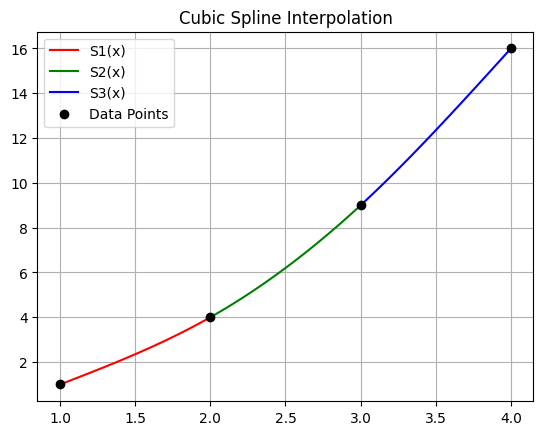

In [26]:
coeffs=np.linalg.solve(matrix,rhs)
print(coeffs)


def S1(x):
    s=0
    for i in range(0,4):
       s+=coeffs[i]*x**(3-i)
    return s 
def S2(x):
    s=0
    for i in range(4,8):
       s+=coeffs[i]*x**((3-i)%4)
    return s 
def S3(x):
    s=0
    for i in range(8,12):
       s+=coeffs[i]*x**((11-i)%4)
    return s

x1 = np.linspace(x[0], x[1], 100)
x2 = np.linspace(x[1],x[2],100)
x3 = np.linspace(x[2], x[3],100)

y1 = S1(x1)
y2 = S2(x2)
y3 = S3(x3)

plt.plot(x1, y1, label='S1(x)', color='red')
plt.plot(x2, y2, label='S2(x)', color='green')
plt.plot(x3, y3, label='S3(x)', color='blue')
plt.scatter(x, y, color='black', zorder=5, label='Data Points')
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.grid (True)
plt.show